In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


train1_df = pd.read_csv('/content/train1.csv', sep=';')  
train2_df = pd.read_csv('/content/train2.csv', sep=';')
test1_df = pd.read_csv('/content/test1.csv', sep=';')
test2_df = pd.read_csv('/content/test2.csv', sep=';')


train_data = pd.concat([train1_df, train2_df], axis=0)
test_data = pd.concat([test1_df, test2_df], axis=0)


train_data_numeric = train_data.select_dtypes(include=['float64', 'int64'])
test_data_numeric = test_data.select_dtypes(include=['float64', 'int64'])

train_data_cleaned = train_data_numeric.dropna(axis=1, thresh=int(0.5 * len(train_data_numeric)))
test_data_cleaned = test_data_numeric.dropna(axis=1, thresh=int(0.5 * len(test_data_numeric)))

train_data_cleaned.fillna(train_data_cleaned.mean(), inplace=True)
test_data_cleaned.fillna(test_data_cleaned.mean(), inplace=True)


scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_cleaned)
test_data_scaled = scaler.transform(test_data_cleaned)

print(pd.DataFrame(train_data_scaled, columns=train_data_cleaned.columns).head())
print(pd.DataFrame(test_data_scaled, columns=test_data_cleaned.columns).head())


   P1_B2004  P1_B2016  P1_B3004  P1_B3005  P1_B4002  P1_B4005  P1_B400B  \
0  0.516495 -0.689052 -0.387362  0.813721   0.20323 -1.009609 -1.023104   
1  0.516495 -0.690687 -0.387362  0.813721   0.20323 -1.009609 -1.022283   
2  0.516495 -0.688507 -0.387362  0.813721   0.20323 -1.009609 -1.024745   
3  0.516495 -0.679789 -0.387362  0.813721   0.20323 -1.009609 -1.019821   
4  0.516495 -0.684693 -0.387362  0.813721   0.20323 -1.009609 -1.021463   

   P1_B4022  P1_FCV01D  P1_FCV01Z  ...  P4_ST_FD  P4_ST_LD  P4_ST_PO  \
0  0.138613  -0.899155  -0.884537  ... -0.183730  0.018116 -0.043687   
1  0.136965  -0.899155  -0.884537  ... -0.578088  0.005497 -0.029612   
2  0.139555  -0.899155  -0.884340  ...  0.900753  0.058602 -0.017295   
3  0.152039  -0.899155  -0.884733  ...  1.640174  0.043356  0.024932   
4  0.144973  -0.899155  -0.884537  ...  0.752869  0.091204  0.028448   

   P4_ST_PS  P4_ST_PT01  P4_ST_TT01    attack  attack_P1  attack_P2  attack_P3  
0  1.204748    -0.57796     0.63359

In [2]:
!pip install tqdm

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from tqdm import tqdm

lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)


batch_size = 1000
lof_predictions = []


print("배치로 LOF 모델 적용 중...")
for i in tqdm(range(0, len(test_data_scaled), batch_size)):
   
    batch = test_data_scaled[i:i+batch_size]

   
    batch_predictions = lof_model.fit_predict(batch)

 
    lof_predictions.extend(batch_predictions)

    print(f"배치 {i // batch_size + 1} 완료")

test_data['LOF_Prediction'] = lof_predictions


outliers_count = (test_data['LOF_Prediction'] == -1).sum()
inliers_count = (test_data['LOF_Prediction'] == 1).sum()

print(f"이상치 개수: {outliers_count}")
print(f"정상치 개수: {inliers_count}")


배치로 LOF 모델 적용 중...


  2%|▏         | 9/445 [00:00<00:05, 82.98it/s]

배치 1 완료
배치 2 완료
배치 3 완료
배치 4 완료
배치 5 완료
배치 6 완료
배치 7 완료
배치 8 완료
배치 9 완료
배치 10 완료
배치 11 완료
배치 12 완료
배치 13 완료
배치 14 완료
배치 15 완료
배치 16 완료
배치 17 완료
배치 18 완료


  4%|▍         | 20/445 [00:00<00:04, 95.80it/s]

배치 19 완료
배치 20 완료
배치 21 완료


  7%|▋         | 31/445 [00:00<00:04, 99.85it/s]

배치 22 완료
배치 23 완료
배치 24 완료
배치 25 완료
배치 26 완료
배치 27 완료
배치 28 완료
배치 29 완료
배치 30 완료
배치 31 완료
배치 32 완료
배치 33 완료
배치 34 완료
배치 35 완료
배치 36 완료
배치 37 완료
배치 38 완료
배치 39 완료
배치 40 완료


  9%|▉         | 42/445 [00:00<00:03, 103.34it/s]

배치 41 완료
배치 42 완료
배치 43 완료


 12%|█▏        | 53/445 [00:00<00:03, 101.87it/s]

배치 44 완료
배치 45 완료
배치 46 완료
배치 47 완료
배치 48 완료
배치 49 완료
배치 50 완료
배치 51 완료
배치 52 완료
배치 53 완료
배치 54 완료
배치 55 완료
배치 56 완료
배치 57 완료
배치 58 완료
배치 59 완료
배치 60 완료
배치 61 완료


 14%|█▍        | 64/445 [00:00<00:03, 103.24it/s]

배치 62 완료
배치 63 완료
배치 64 완료
배치 65 완료


 17%|█▋        | 75/445 [00:00<00:03, 105.02it/s]

배치 66 완료
배치 67 완료
배치 68 완료
배치 69 완료
배치 70 완료
배치 71 완료
배치 72 완료
배치 73 완료
배치 74 완료
배치 75 완료
배치 76 완료
배치 77 완료
배치 78 완료
배치 79 완료
배치 80 완료
배치 81 완료
배치 82 완료
배치 83 완료


 19%|█▉        | 86/445 [00:00<00:03, 102.55it/s]

배치 84 완료
배치 85 완료
배치 86 완료


 22%|██▏       | 97/445 [00:00<00:03, 100.21it/s]

배치 87 완료
배치 88 완료
배치 89 완료
배치 90 완료
배치 91 완료
배치 92 완료
배치 93 완료
배치 94 완료
배치 95 완료
배치 96 완료
배치 97 완료
배치 98 완료
배치 99 완료
배치 100 완료
배치 101 완료
배치 102 완료
배치 103 완료
배치 104 완료
배치 105 완료
배치 106 완료
배치 107 완료


 27%|██▋       | 119/445 [00:01<00:03, 100.74it/s]

배치 108 완료
배치 109 완료
배치 110 완료
배치 111 완료
배치 112 완료
배치 113 완료
배치 114 완료
배치 115 완료
배치 116 완료
배치 117 완료
배치 118 완료
배치 119 완료
배치 120 완료
배치 121 완료
배치 122 완료
배치 123 완료
배치 124 완료
배치 125 완료
배치 126 완료
배치 127 완료


 32%|███▏      | 141/445 [00:01<00:03, 98.27it/s]

배치 128 완료
배치 129 완료
배치 130 완료
배치 131 완료
배치 132 완료
배치 133 완료
배치 134 완료
배치 135 완료
배치 136 완료
배치 137 완료
배치 138 완료
배치 139 완료
배치 140 완료
배치 141 완료
배치 142 완료
배치 143 완료
배치 144 완료
배치 145 완료
배치 146 완료
배치 147 완료
배치 148 완료


 37%|███▋      | 163/445 [00:01<00:02, 98.95it/s] 

배치 149 완료
배치 150 완료
배치 151 완료
배치 152 완료
배치 153 완료
배치 154 완료
배치 155 완료
배치 156 완료
배치 157 완료
배치 158 완료
배치 159 완료
배치 160 완료
배치 161 완료
배치 162 완료
배치 163 완료
배치 164 완료
배치 165 완료
배치 166 완료
배치 167 완료
배치 168 완료


 41%|████      | 183/445 [00:01<00:02, 94.11it/s]

배치 169 완료
배치 170 완료
배치 171 완료
배치 172 완료
배치 173 완료
배치 174 완료
배치 175 완료
배치 176 완료
배치 177 완료
배치 178 완료
배치 179 완료
배치 180 완료
배치 181 완료
배치 182 완료
배치 183 완료
배치 184 완료
배치 185 완료
배치 186 완료


 43%|████▎     | 193/445 [00:01<00:02, 92.19it/s]

배치 187 완료
배치 188 완료
배치 189 완료
배치 190 완료
배치 191 완료
배치 192 완료
배치 193 완료
배치 194 완료
배치 195 완료
배치 196 완료
배치 197 완료
배치 198 완료
배치 199 완료
배치 200 완료
배치 201 완료
배치 202 완료


 46%|████▌     | 203/445 [00:02<00:02, 92.43it/s]

배치 203 완료
배치 204 완료
배치 205 완료


 48%|████▊     | 213/445 [00:02<00:02, 90.30it/s]

배치 206 완료
배치 207 완료
배치 208 완료
배치 209 완료
배치 210 완료
배치 211 완료
배치 212 완료
배치 213 완료
배치 214 완료
배치 215 완료
배치 216 완료
배치 217 완료
배치 218 완료
배치 219 완료
배치 220 완료
배치 221 완료


 50%|█████     | 223/445 [00:02<00:02, 91.81it/s]

배치 222 완료
배치 223 완료
배치 224 완료


 52%|█████▏    | 233/445 [00:02<00:02, 88.85it/s]

배치 225 완료
배치 226 완료
배치 227 완료
배치 228 완료
배치 229 완료
배치 230 완료
배치 231 완료
배치 232 완료
배치 233 완료
배치 234 완료
배치 235 완료
배치 236 완료
배치 237 완료
배치 238 완료
배치 239 완료


 55%|█████▍    | 243/445 [00:02<00:02, 90.83it/s]

배치 240 완료
배치 241 완료
배치 242 완료
배치 243 완료


 57%|█████▋    | 253/445 [00:02<00:02, 92.04it/s]

배치 244 완료
배치 245 완료
배치 246 완료
배치 247 완료
배치 248 완료
배치 249 완료
배치 250 완료
배치 251 완료
배치 252 완료
배치 253 완료
배치 254 완료
배치 255 완료
배치 256 완료
배치 257 완료
배치 258 완료
배치 259 완료
배치 260 완료
배치 261 완료
배치 262 완료


 61%|██████▏   | 273/445 [00:02<00:01, 90.00it/s]

배치 263 완료
배치 264 완료
배치 265 완료
배치 266 완료
배치 267 완료
배치 268 완료
배치 269 완료
배치 270 완료
배치 271 완료
배치 272 완료
배치 273 완료
배치 274 완료
배치 275 완료
배치 276 완료
배치 277 완료
배치 278 완료
배치 279 완료
배치 280 완료


 66%|██████▌   | 293/445 [00:03<00:01, 91.17it/s]

배치 281 완료
배치 282 완료
배치 283 완료
배치 284 완료
배치 285 완료
배치 286 완료
배치 287 완료
배치 288 완료
배치 289 완료
배치 290 완료
배치 291 완료
배치 292 완료
배치 293 완료
배치 294 완료
배치 295 완료
배치 296 완료
배치 297 완료
배치 298 완료
배치 299 완료
배치 300 완료


 70%|███████   | 313/445 [00:03<00:01, 92.34it/s]

배치 301 완료
배치 302 완료
배치 303 완료
배치 304 완료
배치 305 완료
배치 306 완료
배치 307 완료
배치 308 완료
배치 309 완료
배치 310 완료
배치 311 완료
배치 312 완료
배치 313 완료
배치 314 완료
배치 315 완료
배치 316 완료
배치 317 완료
배치 318 완료
배치 319 완료


 73%|███████▎  | 323/445 [00:03<00:01, 90.62it/s]

배치 320 완료
배치 321 완료
배치 322 완료
배치 323 완료
배치 324 완료
배치 325 완료
배치 326 완료
배치 327 완료
배치 328 완료
배치 329 완료
배치 330 완료
배치 331 완료
배치 332 완료


 75%|███████▍  | 333/445 [00:03<00:01, 88.97it/s]

배치 333 완료
배치 334 완료
배치 335 완료
배치 336 완료
배치 337 완료


 77%|███████▋  | 343/445 [00:03<00:01, 89.86it/s]

배치 338 완료
배치 339 완료
배치 340 완료
배치 341 완료
배치 342 완료
배치 343 완료
배치 344 완료
배치 345 완료
배치 346 완료
배치 347 완료
배치 348 완료
배치 349 완료
배치 350 완료
배치 351 완료


 79%|███████▉  | 353/445 [00:03<00:01, 89.99it/s]

배치 352 완료
배치 353 완료
배치 354 완료
배치 355 완료
배치 356 완료


 82%|████████▏ | 363/445 [00:03<00:00, 88.83it/s]

배치 357 완료
배치 358 완료
배치 359 완료
배치 360 완료
배치 361 완료
배치 362 완료
배치 363 완료
배치 364 완료
배치 365 완료
배치 366 완료
배치 367 완료
배치 368 완료
배치 369 완료


 84%|████████▎ | 372/445 [00:03<00:00, 88.27it/s]

배치 370 완료
배치 371 완료
배치 372 완료
배치 373 완료
배치 374 완료


 86%|████████▌ | 381/445 [00:04<00:00, 87.17it/s]

배치 375 완료
배치 376 완료
배치 377 완료
배치 378 완료
배치 379 완료
배치 380 완료
배치 381 완료
배치 382 완료
배치 383 완료
배치 384 완료
배치 385 완료
배치 386 완료


 88%|████████▊ | 390/445 [00:04<00:00, 85.31it/s]

배치 387 완료
배치 388 완료
배치 389 완료
배치 390 완료
배치 391 완료


 90%|████████▉ | 399/445 [00:04<00:00, 86.49it/s]

배치 392 완료
배치 393 완료
배치 394 완료
배치 395 완료
배치 396 완료
배치 397 완료
배치 398 완료
배치 399 완료
배치 400 완료
배치 401 완료
배치 402 완료
배치 403 완료
배치 404 완료
배치 405 완료


 92%|█████████▏| 409/445 [00:04<00:00, 89.41it/s]

배치 406 완료
배치 407 완료
배치 408 완료
배치 409 완료
배치 410 완료


 94%|█████████▍| 419/445 [00:04<00:00, 90.01it/s]

배치 411 완료
배치 412 완료
배치 413 완료
배치 414 완료
배치 415 완료
배치 416 완료
배치 417 완료
배치 418 완료
배치 419 완료
배치 420 완료
배치 421 완료
배치 422 완료
배치 423 완료
배치 424 완료
배치 425 완료
배치 426 완료
배치 427 완료
배치 428 완료


 98%|█████████▊| 438/445 [00:04<00:00, 88.47it/s]

배치 429 완료
배치 430 완료
배치 431 완료
배치 432 완료
배치 433 완료
배치 434 완료
배치 435 완료
배치 436 완료
배치 437 완료
배치 438 완료
배치 439 완료
배치 440 완료
배치 441 완료


100%|██████████| 445/445 [00:04<00:00, 92.70it/s]

배치 442 완료
배치 443 완료
배치 444 완료
배치 445 완료


이상치 개수: 22230
정상치 개수: 422370


In [4]:
from sklearn.metrics import classification_report, accuracy_score

true_labels = test_data['attack']  


lof_predictions_binary = [1 if x == -1 else 0 for x in lof_predictions]


accuracy = accuracy_score(true_labels, lof_predictions_binary)
print(f"모델 정확도: {accuracy * 100:.2f}%")

print(classification_report(true_labels, lof_predictions_binary, target_names=['정상', '이상치']))


모델 정확도: 91.52%
              precision    recall  f1-score   support

          정상       0.96      0.95      0.96    427073
         이상치       0.05      0.06      0.05     17527

    accuracy                           0.92    444600
   macro avg       0.50      0.50      0.50    444600
weighted avg       0.92      0.92      0.92    444600



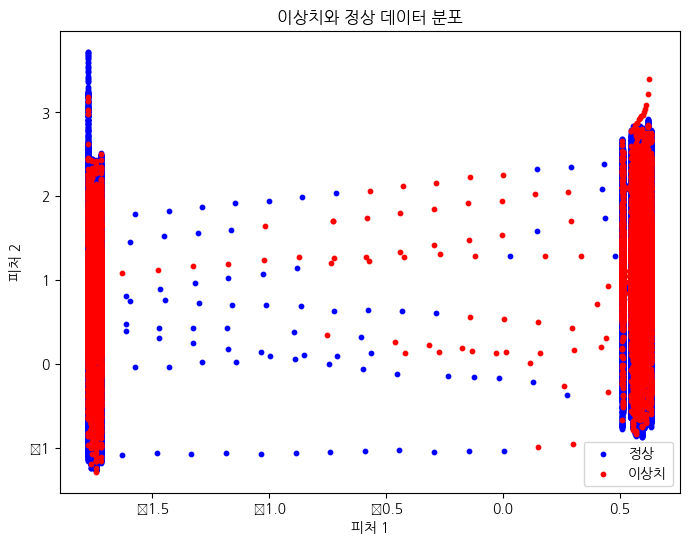

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))

# 정상 데이터 (LOF_Prediction == 1)
plt.scatter(test_data_scaled[test_data['LOF_Prediction'] == 1, 0],
            test_data_scaled[test_data['LOF_Prediction'] == 1, 1],
            label='정상', c='blue', s=10)

# 이상치 데이터 (LOF_Prediction == -1)
plt.scatter(test_data_scaled[test_data['LOF_Prediction'] == -1, 0],
            test_data_scaled[test_data['LOF_Prediction'] == -1, 1],
            label='이상치', c='red', s=10)

plt.title('이상치와 정상 데이터 분포')
plt.xlabel('피처 1')
plt.ylabel('피처 2')
plt.legend()
plt.show()


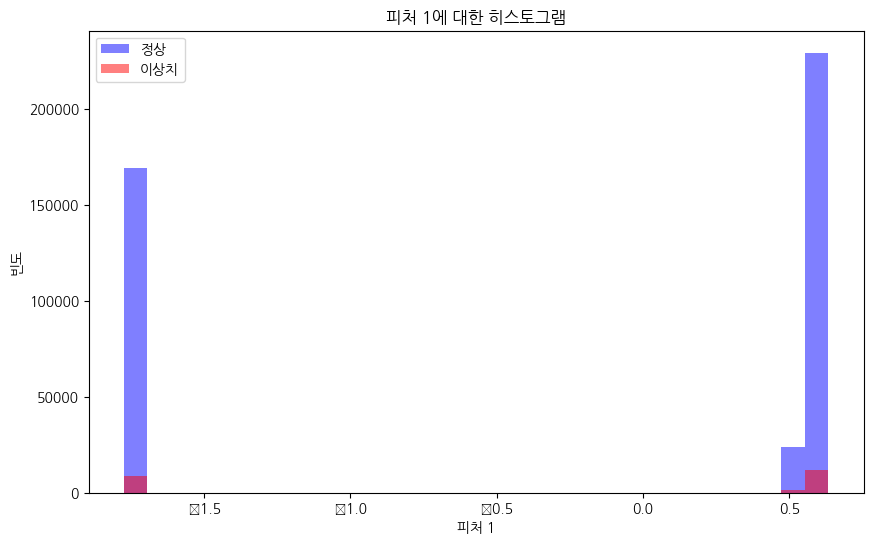

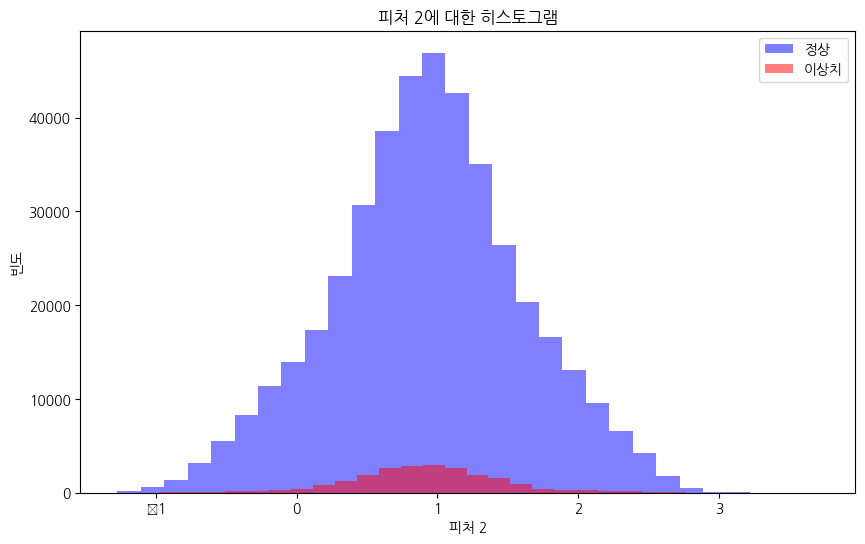

In [7]:

plt.figure(figsize=(10, 6))

# 피처 1에 대한 히스토그램 (정상치와 이상치 분포)
plt.hist(test_data_scaled[test_data['LOF_Prediction'] == 1][:, 0], bins=30, alpha=0.5, label='정상', color='blue')
plt.hist(test_data_scaled[test_data['LOF_Prediction'] == -1][:, 0], bins=30, alpha=0.5, label='이상치', color='red')
plt.title('피처 1에 대한 히스토그램')
plt.xlabel('피처 1')
plt.ylabel('빈도')
plt.legend()
plt.show()

# 피처 2에 대한 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(test_data_scaled[test_data['LOF_Prediction'] == 1][:, 1], bins=30, alpha=0.5, label='정상', color='blue')
plt.hist(test_data_scaled[test_data['LOF_Prediction'] == -1][:, 1], bins=30, alpha=0.5, label='이상치', color='red')
plt.title('피처 2에 대한 히스토그램')
plt.xlabel('피처 2')
plt.ylabel('빈도')
plt.legend()
plt.show()


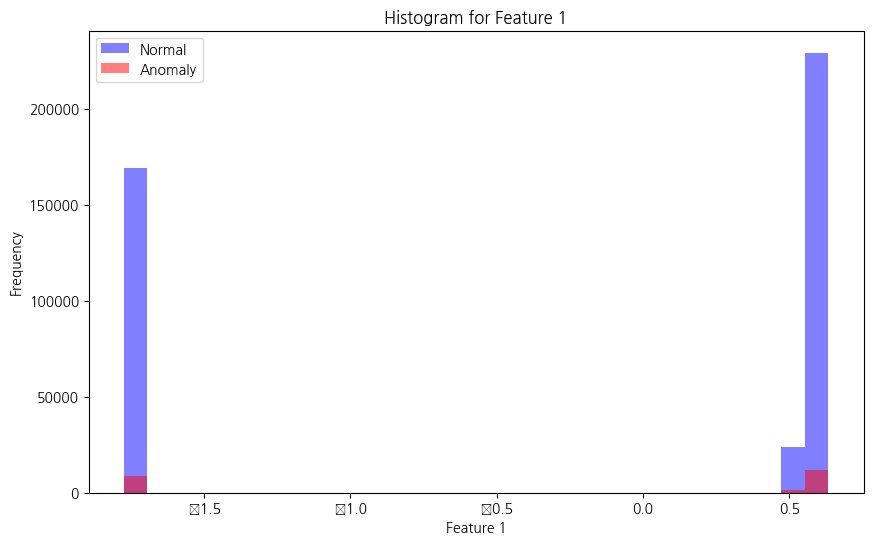

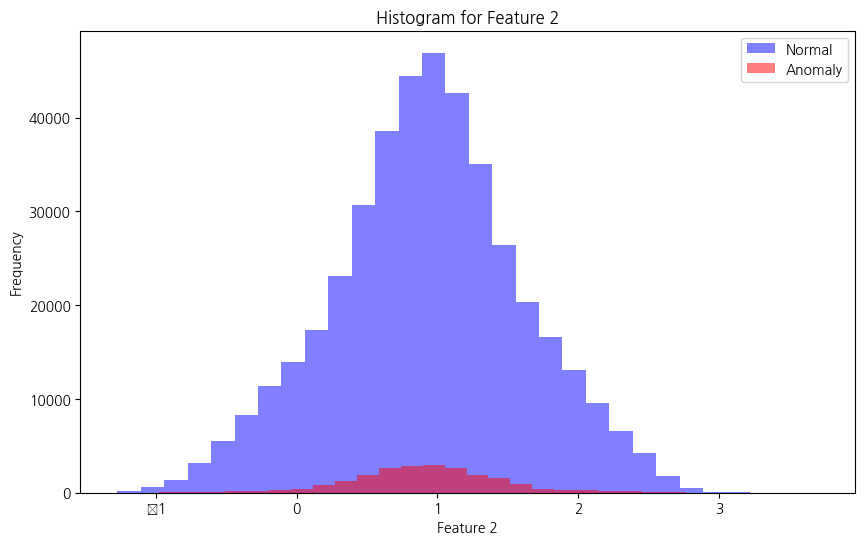

In [8]:
# Histogram for Feature 1
plt.figure(figsize=(10, 6))
plt.hist(test_data_scaled[test_data['LOF_Prediction'] == 1][:, 0], bins=30, alpha=0.5, label='Normal', color='blue')
plt.hist(test_data_scaled[test_data['LOF_Prediction'] == -1][:, 0], bins=30, alpha=0.5, label='Anomaly', color='red')
plt.title('Histogram for Feature 1')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histogram for Feature 2
plt.figure(figsize=(10, 6))
plt.hist(test_data_scaled[test_data['LOF_Prediction'] == 1][:, 1], bins=30, alpha=0.5, label='Normal', color='blue')
plt.hist(test_data_scaled[test_data['LOF_Prediction'] == -1][:, 1], bins=30, alpha=0.5, label='Anomaly', color='red')
plt.title('Histogram for Feature 2')
plt.xlabel('Feature 2')
plt.ylabel('Frequency')
plt.legend()
plt.show()


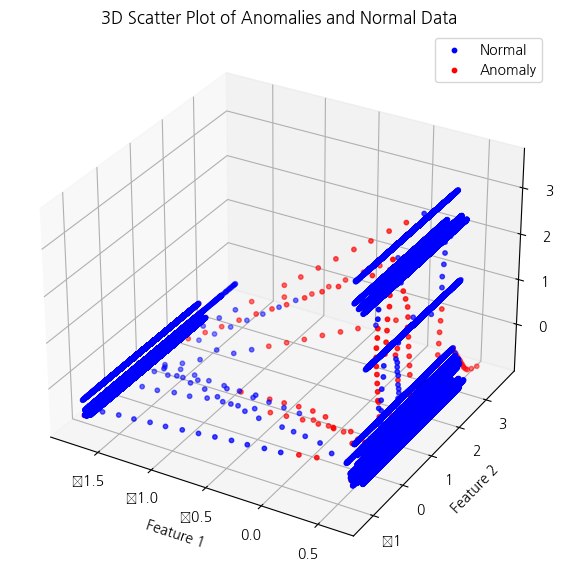

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# 3D visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Normal data
ax.scatter(test_data_scaled[test_data['LOF_Prediction'] == 1, 0],
           test_data_scaled[test_data['LOF_Prediction'] == 1, 1],
           test_data_scaled[test_data['LOF_Prediction'] == 1, 2],
           label='Normal', c='blue', s=10)

# Anomalies
ax.scatter(test_data_scaled[test_data['LOF_Prediction'] == -1, 0],
           test_data_scaled[test_data['LOF_Prediction'] == -1, 1],
           test_data_scaled[test_data['LOF_Prediction'] == -1, 2],
           label='Anomaly', c='red', s=10)

ax.set_title('3D Scatter Plot of Anomalies and Normal Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()


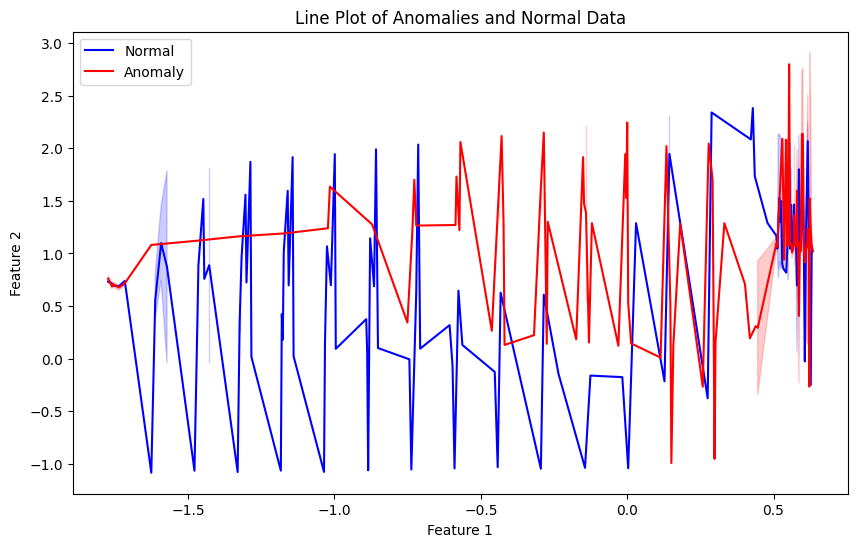

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'sans-serif'  
plt.rcParams['font.sans-serif'] = ['Arial']  


plt.figure(figsize=(10, 6))


sns.lineplot(x=test_data_scaled[test_data['LOF_Prediction'] == 1][:, 0],
             y=test_data_scaled[test_data['LOF_Prediction'] == 1][:, 1],
             label='Normal', color='blue')


sns.lineplot(x=test_data_scaled[test_data['LOF_Prediction'] == -1][:, 0],
             y=test_data_scaled[test_data['LOF_Prediction'] == -1][:, 1],
             label='Anomaly', color='red')


plt.title('Line Plot of Anomalies and Normal Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
